In [1]:
import pandas as pd
import os

In [2]:
import glob

def list_files(dir):                                                                                                  
    r = []                                                                                                            
    subdirs = [x[0] for x in os.walk(dir)]                                                                            
    for subdir in subdirs:                                                                                            
        files = os.walk(subdir).__next__()[2]                                                                             
        if (len(files) > 0):                                                                                          
            for file in files:
                if "Bibliography" in file:
                    continue
                if("doclist" in file):
                    continue
                if(".docx" in file):
                    r.append(os.path.join(subdir, file))                                                                         
    return r                                                                                                          



In [3]:
file_list = list_files("/Users/Mihir/Downloads/Sample/")

In [4]:
import pandas as pd
xml = "/Users/Mihir/Downloads/Sample/dronepatents_population.csv"
df = pd.read_csv(xml)
words = df['abstract'].tolist()

In [5]:
#import numpy
#import math
#df = pd.read_excel('/Users/Mihir/Downloads/Sample/wsj.xlsx', engine='openpyxl') 
#t = df['Content'].tolist()
#for x in t:
#    if(pd.isnull(x)):
 #       continue
  #  one.append(x)

In [6]:
from dateutil.parser import parse
from pandas import DataFrame
import re
one = []
two = [] 
#words to drop 
drop_words= {'brood', 'norethindrone', 'bagpipe', 'quinhydrone', 'schisandrone'}
three = []
#split up files between dates
for i in words:
    one.append(i)
    for j in drop_words:
            if(j in i):
                one.pop()
                break
print(one[0])

#convert each of the date arrays into data frames


the disclosed unmanned aerial vehicle (uav) includes a buoyant airbag, a drive unit, a retention feature, and an onboard control module that can be configured to cause the drive unit to displace the uav, cause the retention feature to retain one or more items for transport, and receive instructions to transfer items from one location to another. for example, a uav can be controlled to obtain an item at one location in a warehouse such as a first floor, lift said item to a second location in the warehouse such as a second floor, and deposit the item at the second location.


In [7]:

df_one = DataFrame(one, columns = ['text'])
df_two = DataFrame(two, columns = ['text'])
df_three = DataFrame(three, columns = ['text'])
df_one['processed'] = df_one['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df_one['processed'] = df_one['text'].map(lambda x: x.lower())

df_two['processed'] = df_two['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df_two['processed'] = df_two['text'].map(lambda x: x.lower())

df_three['processed'] = df_three['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df_three['processed'] = df_three['text'].map(lambda x: x.lower())

In [8]:
print(len(one))

2831


In [9]:
import gensim
from gensim.utils import simple_preprocess
#remove the punctuations and preprocess words 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df_one.processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])


['the', 'disclosed', 'unmanned', 'aerial', 'vehicle', 'uav', 'includes', 'buoyant', 'airbag', 'drive', 'unit', 'retention', 'feature', 'and', 'an', 'onboard', 'control', 'module', 'that', 'can', 'be', 'configured', 'to', 'cause', 'the', 'drive', 'unit', 'to', 'displace', 'the']


In [10]:
#convert to bigram/trigram model
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = " ".join(sent)
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [12]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_trigrams(data_words_nostops)
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_trigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

In [13]:
import nltk
words = []
#Lemmatize words and preprocess parargraphs for lda analysis
#
for i in range(len(data_words_bigrams)):
    wn = nltk.WordNetLemmatizer()
    words.append([wn.lemmatize(word) for word in data_words_bigrams[i]])

In [14]:
import re
import string
import nltk
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer

In [15]:
from nltk.corpus import wordnet as wn
#define set of noun anv verbs
nouns = {x.name().split('.', 1)[0] for x in wn.all_synsets('n')}
verbs = {x.name().split('.', 1)[0] for x in wn.all_synsets('v')}

In [16]:
from nltk.corpus import wordnet
dictionary = {}
#create dictionary based on how many times a word appears in each of the files
for i in range(len(words)):
    s = set(words[i])
    for w in s:
        if(w in dictionary):
            dictionary[w]+=1
        else:
            dictionary[w] = 0
#filteer out words than are less than two letters long, appear in 85% of files, and by part of speach
for i in range(len(words)):
    temp = []
    for w in words[i]:
        temp.append(w)
    for w in words[i]:
        if(dictionary[w]>=(len(words) * 0.85) or len(w)<=2 or (w not in nouns) ):
            temp.remove(w)
    words[i] = temp
temp = []

In [17]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
#convert word to corpus to be read by LDA module
id2word = corpora.Dictionary(words)
text = words
corpus = [id2word.doc2bow(text) for text in words]

In [21]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.049*"drone" + 0.046*"system" + 0.045*"vehicle" + 0.025*"control" + '
  '0.022*"may" + 0.021*"method" + 0.016*"signal" + 0.012*"aircraft" + '
  '0.012*"flight" + 0.011*"apparatus"'),
 (1,
  '0.052*"system" + 0.034*"information" + 0.031*"vehicle" + 0.031*"data" + '
  '0.018*"plurality" + 0.016*"drone" + 0.013*"one" + 0.013*"may" + '
  '0.013*"device" + 0.013*"aircraft"'),
 (2,
  '0.049*"system" + 0.029*"vehicle" + 0.029*"power" + 0.019*"one" + '
  '0.017*"communication" + 0.016*"first" + 0.014*"flight" + 0.014*"location" + '
  '0.012*"base" + 0.012*"data"'),
 (3,
  '0.052*"flight" + 0.048*"vehicle" + 0.035*"may" + 0.033*"device" + '
  '0.023*"method" + 0.023*"system" + 0.021*"information" + 0.018*"control" + '
  '0.016*"path" + 0.015*"drone"'),
 (4,
  '0.029*"drone" + 0.027*"control" + 0.024*"flight" + 0.022*"one" + '
  '0.022*"device" + 0.019*"image" + 0.019*"plurality" + 0.017*"method" + '
  '0.017*"data" + 0.016*"information"'),
 (5,
  '0.038*"image" + 0.038*"vehicle" + 0.02

In [22]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/Mihir/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/Mihir/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.005726  0.021531       1        1  10.914106
8     -0.019990  0.008761       2        1  10.327617
3     -0.016229  0.035478       3        1  10.245405
0     -0.007359 -0.003384       4        1   8.751967
14    -0.039418  0.009832       5        1   7.757079
5     -0.014808  0.031976       6        1   7.616239
9     -0.019155 -0.002430       7        1   6.909500
4     -0.039331  0.018522       8        1   6.785032
2     -0.000545 -0.028562       9        1   6.582309
6      0.032189  0.022943      10        1   5.601471
13     0.023150  0.046738      11        1   5.263676
10    -0.026235  0.021780      12        1   4.927064
1      0.019456  0.007871      13        1   4.215142
11    -0.063697 -0.141297      14        1   2.469487
7      0.166246 -0.049759      15        1   1.633904, topic_info=            Term         Freq        Total Category  logprob  loglift
34        system  3471.000000  3471.000000  Default  30.0000  30.0000
94         drone  2734.000000  2734.000000  Default  29.0000  29.0000
254  information  1106.000000  1106.000000  Default  28.0000  28.0000
13           one  2466.000000  2466.000000  Default  27.0000  27.0000
84         image  1152.000000  1152.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
362     terminal     9.528520   197.955536  Topic15  -5.2716   1.0804
6          first    11.736431  1648.173344  Topic15  -5.0632  -0.8305
15        second    11.235706  1130.542051  Topic15  -5.1068  -0.4972
94         drone    12.131321  2734.789880  Topic15  -5.0301  -1.3038
179       ground    10.444766   516.279797  Topic15  -5.1798   0.2137

[1146 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
948       1  0.599138  absorption
948       7  0.074892  absorption
948       9  0.074892  absorption
948      10  0.074892  absorption
948      11  0.074892  absorption
...     ...       ...         ...
1733      7  0.680640        word
937      11  0.230183   workpiece
937      12  0.460365   workpiece
2884      3  0.207398        zinc
2884      7  0.622193        zinc

[3902 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 9, 4, 1, 15, 6, 10, 5, 3, 7, 14, 11, 2, 12, 8])

In [23]:
#Save LDA in file
df = LDAvis_prepared[1]
df = df.drop(columns = ["Freq", "Total", "logprob", "loglift"])
print(df)
compression_opts = dict(method='zip',
                         archive_name='15.csv')  
df.to_csv('patent_times.zip', index=False,
           compression=compression_opts)  

            Term Category
34        system  Default
94         drone  Default
254  information  Default
13           one  Default
84         image  Default
..           ...      ...
362     terminal  Topic15
6          first  Topic15
15        second  Topic15
94         drone  Topic15
179       ground  Topic15

[1146 rows x 2 columns]


/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


df = LDAvis_prepared[1]
print(df)

In [34]:
# supporting function
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.5,
                                           eta=0.5)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words, start=2, limit=40, step=6)
# Show graph


/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'matplotlib'

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


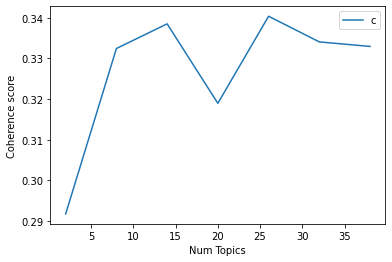

In [36]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

